<h1>Multi-class prediction of obesity risk</h1>

In [158]:
# pip install seaborn --upgrade

In [159]:
# pip install --upgrade pip

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
df = pd.read_csv('train.csv')
df_test_1 = pd.read_csv('test.csv')
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [162]:
df.shape

(20758, 18)

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [164]:
df.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [165]:
df.nunique()

id                                20758
Gender                                2
Age                                1703
Height                             1833
Weight                             1979
family_history_with_overweight        2
FAVC                                  2
FCVC                                934
NCP                                 689
CAEC                                  4
SMOKE                                 2
CH2O                               1506
SCC                                   2
FAF                                1360
TUE                                1297
CALC                                  3
MTRANS                                5
NObeyesdad                            7
dtype: int64

In [166]:
# Gender	Sex
# Age	Age
# Height	Height
# Weight	Weight
# FHWO	Overweight family members
# FAVC	Consume high-calorie foods frequently
# FCVC	Number of meals where you usually eat vegetables
# NCP	Number of main meals a day
# CAEC	Eat food between meals
# SMOKE	How often you smoke
# CH2O	Liters of water you drink a day
# SCC	Monitor the calories you consume daily
# FAF	Frequency of days per week that you often have physical activity
# TUE	Time of use of technological devices on a daily basis
# CALC	Frequency of alcohol intake.
# MTRANS	Means of transportation that you use regularly
# NObeyesdad	Body mass index

In [167]:
df.drop('id', axis=1, inplace=True)

In [168]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [169]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64


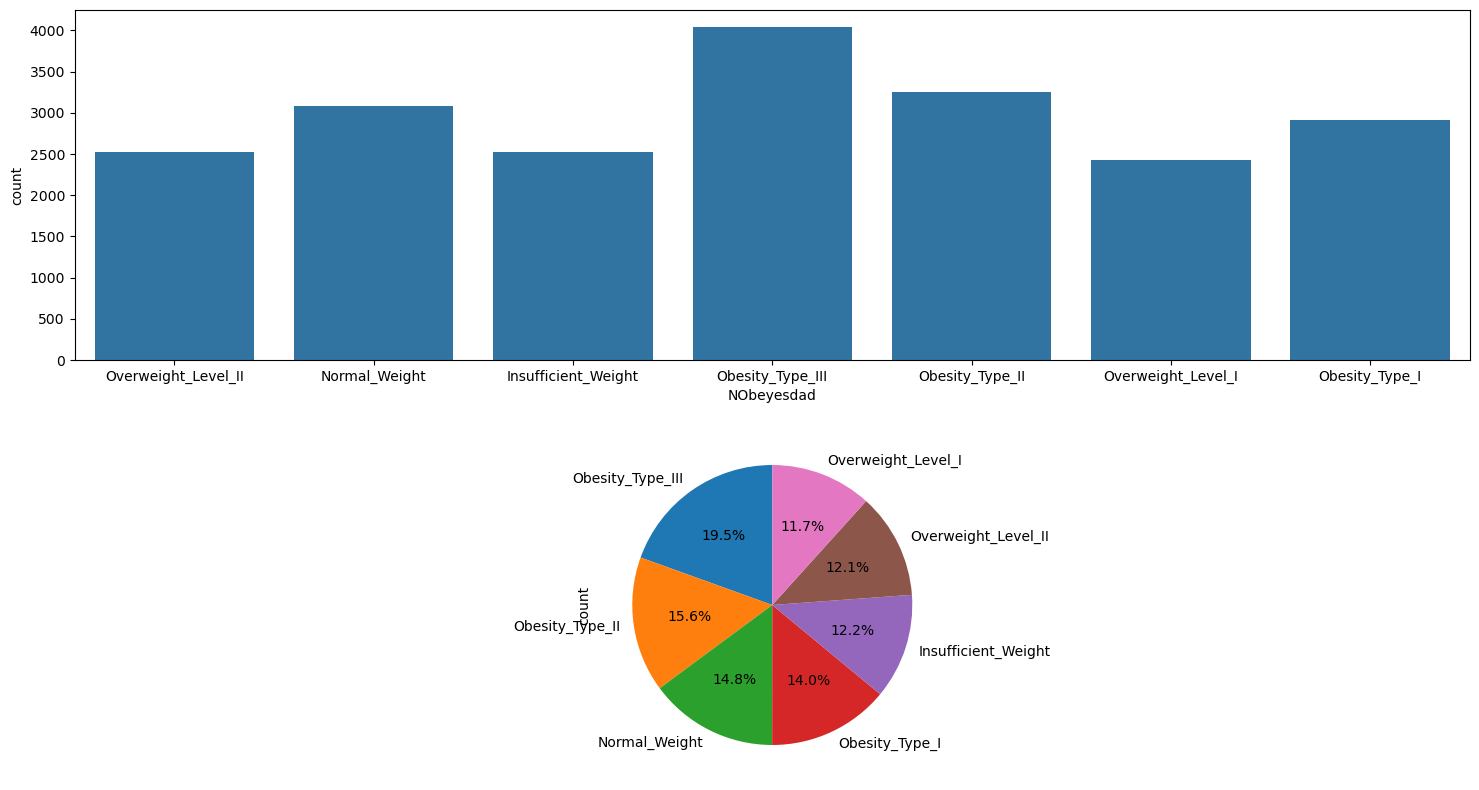

In [170]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 10))
print(df['NObeyesdad'].value_counts())
sns.countplot(df, x=df['NObeyesdad'], ax=ax[0])
df['NObeyesdad'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=ax[1])
plt.show()

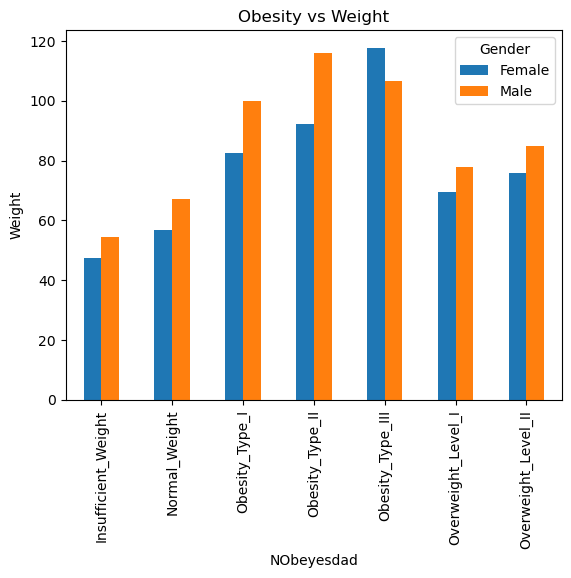

In [171]:
df.groupby(['NObeyesdad', 'Gender'])['Weight'].mean().unstack().plot(kind='bar')
plt.ylabel('Weight')
plt.title('Obesity vs Weight')
plt.show()

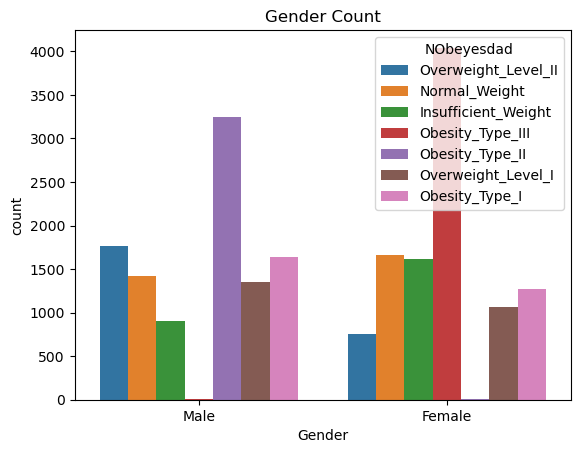

In [172]:
# gender_counts = df['Gender'].value_counts()
# print(gender_counts)
# plt.bar(gender_counts.index, gender_counts, color=['blue', 'orange'])
# plt.xlabel('Gender')
# plt.ylabel('Value_counts')
# plt.title('Gender Counts')
# plt.show()

sns.countplot(df, x=df['Gender'], hue=df['NObeyesdad'])
plt.title('Gender Count')
plt.show()

<Axes: xlabel='Weight', ylabel='Count'>

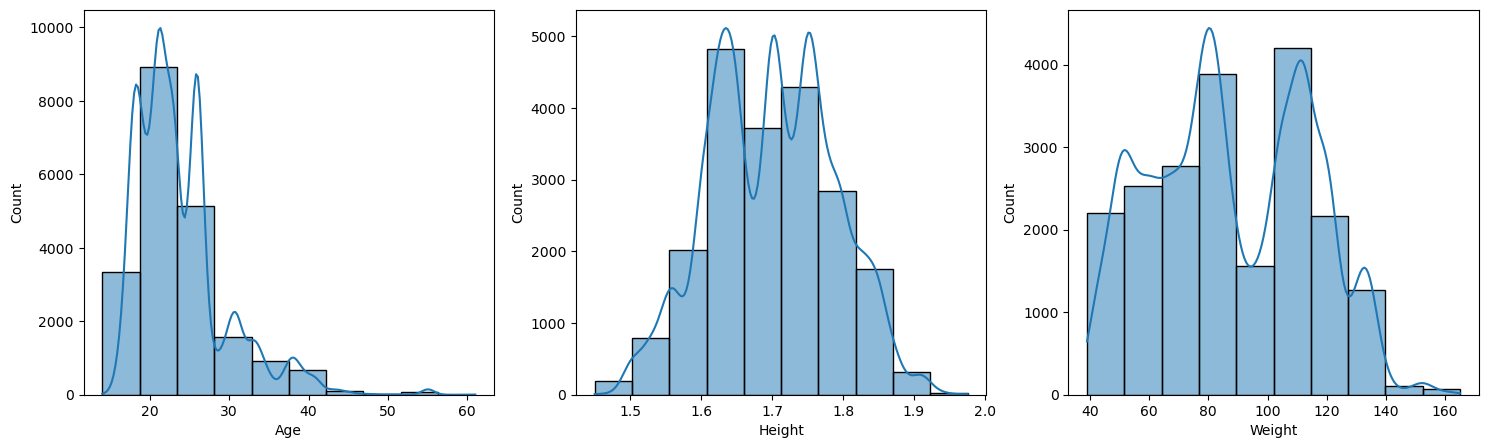

In [173]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

sns.histplot(df['Age'],bins=10, kde=True, ax=axes[0])
sns.histplot(df['Height'],bins=10, kde=True, ax=axes[1])
sns.histplot(df['Weight'],bins=10, kde=True, ax=axes[2])
 

In [174]:
df['BMI'] = df['Weight']/(df['Height']**2)
df_test_1['BMI'] = df_test_1['Weight']/(df_test_1['Height']**2)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,28.259565
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,23.422091
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,17.126706
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,44.855798
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,25.599151


<Axes: xlabel='BMI', ylabel='Count'>

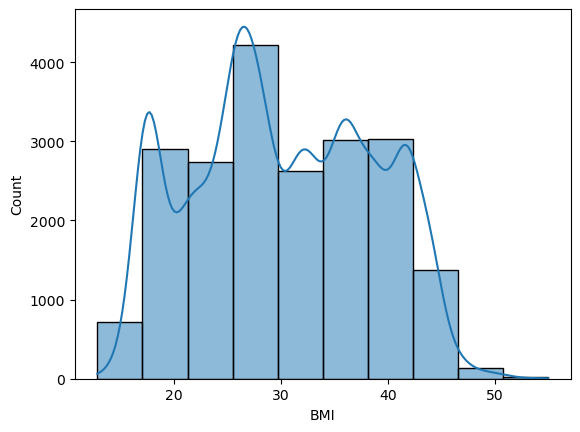

In [175]:
sns.histplot(df, x=df['BMI'],bins=10, kde=True)

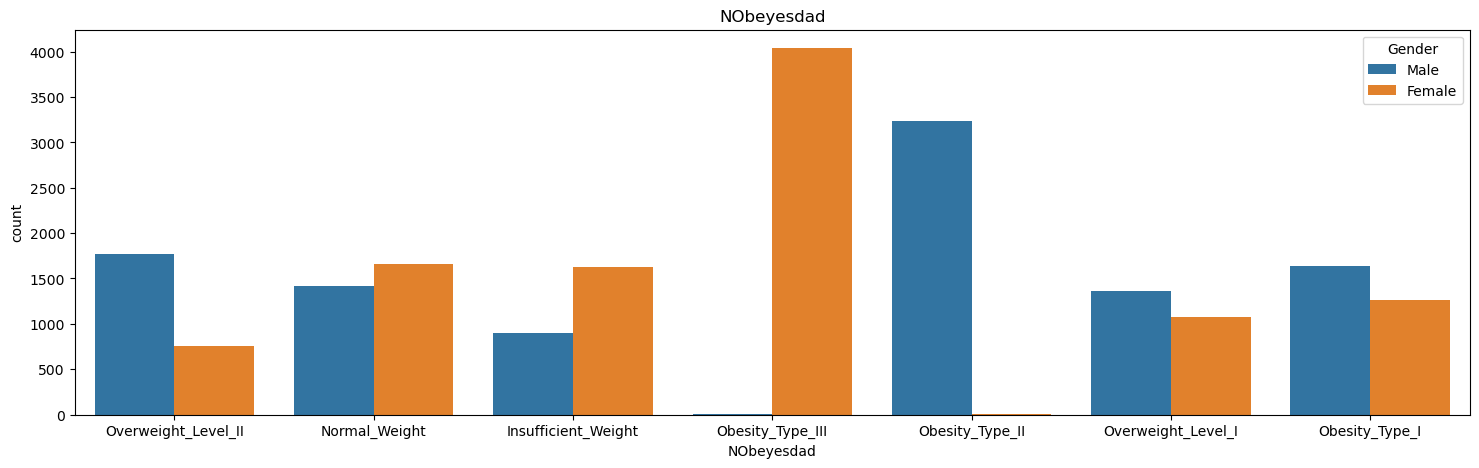

In [176]:
fit = plt.figure(figsize=(18, 5))
sns.countplot(df, x=df['NObeyesdad'], hue='Gender')
plt.title('NObeyesdad')
plt.show()

#Apply one hot encoding on this dataset

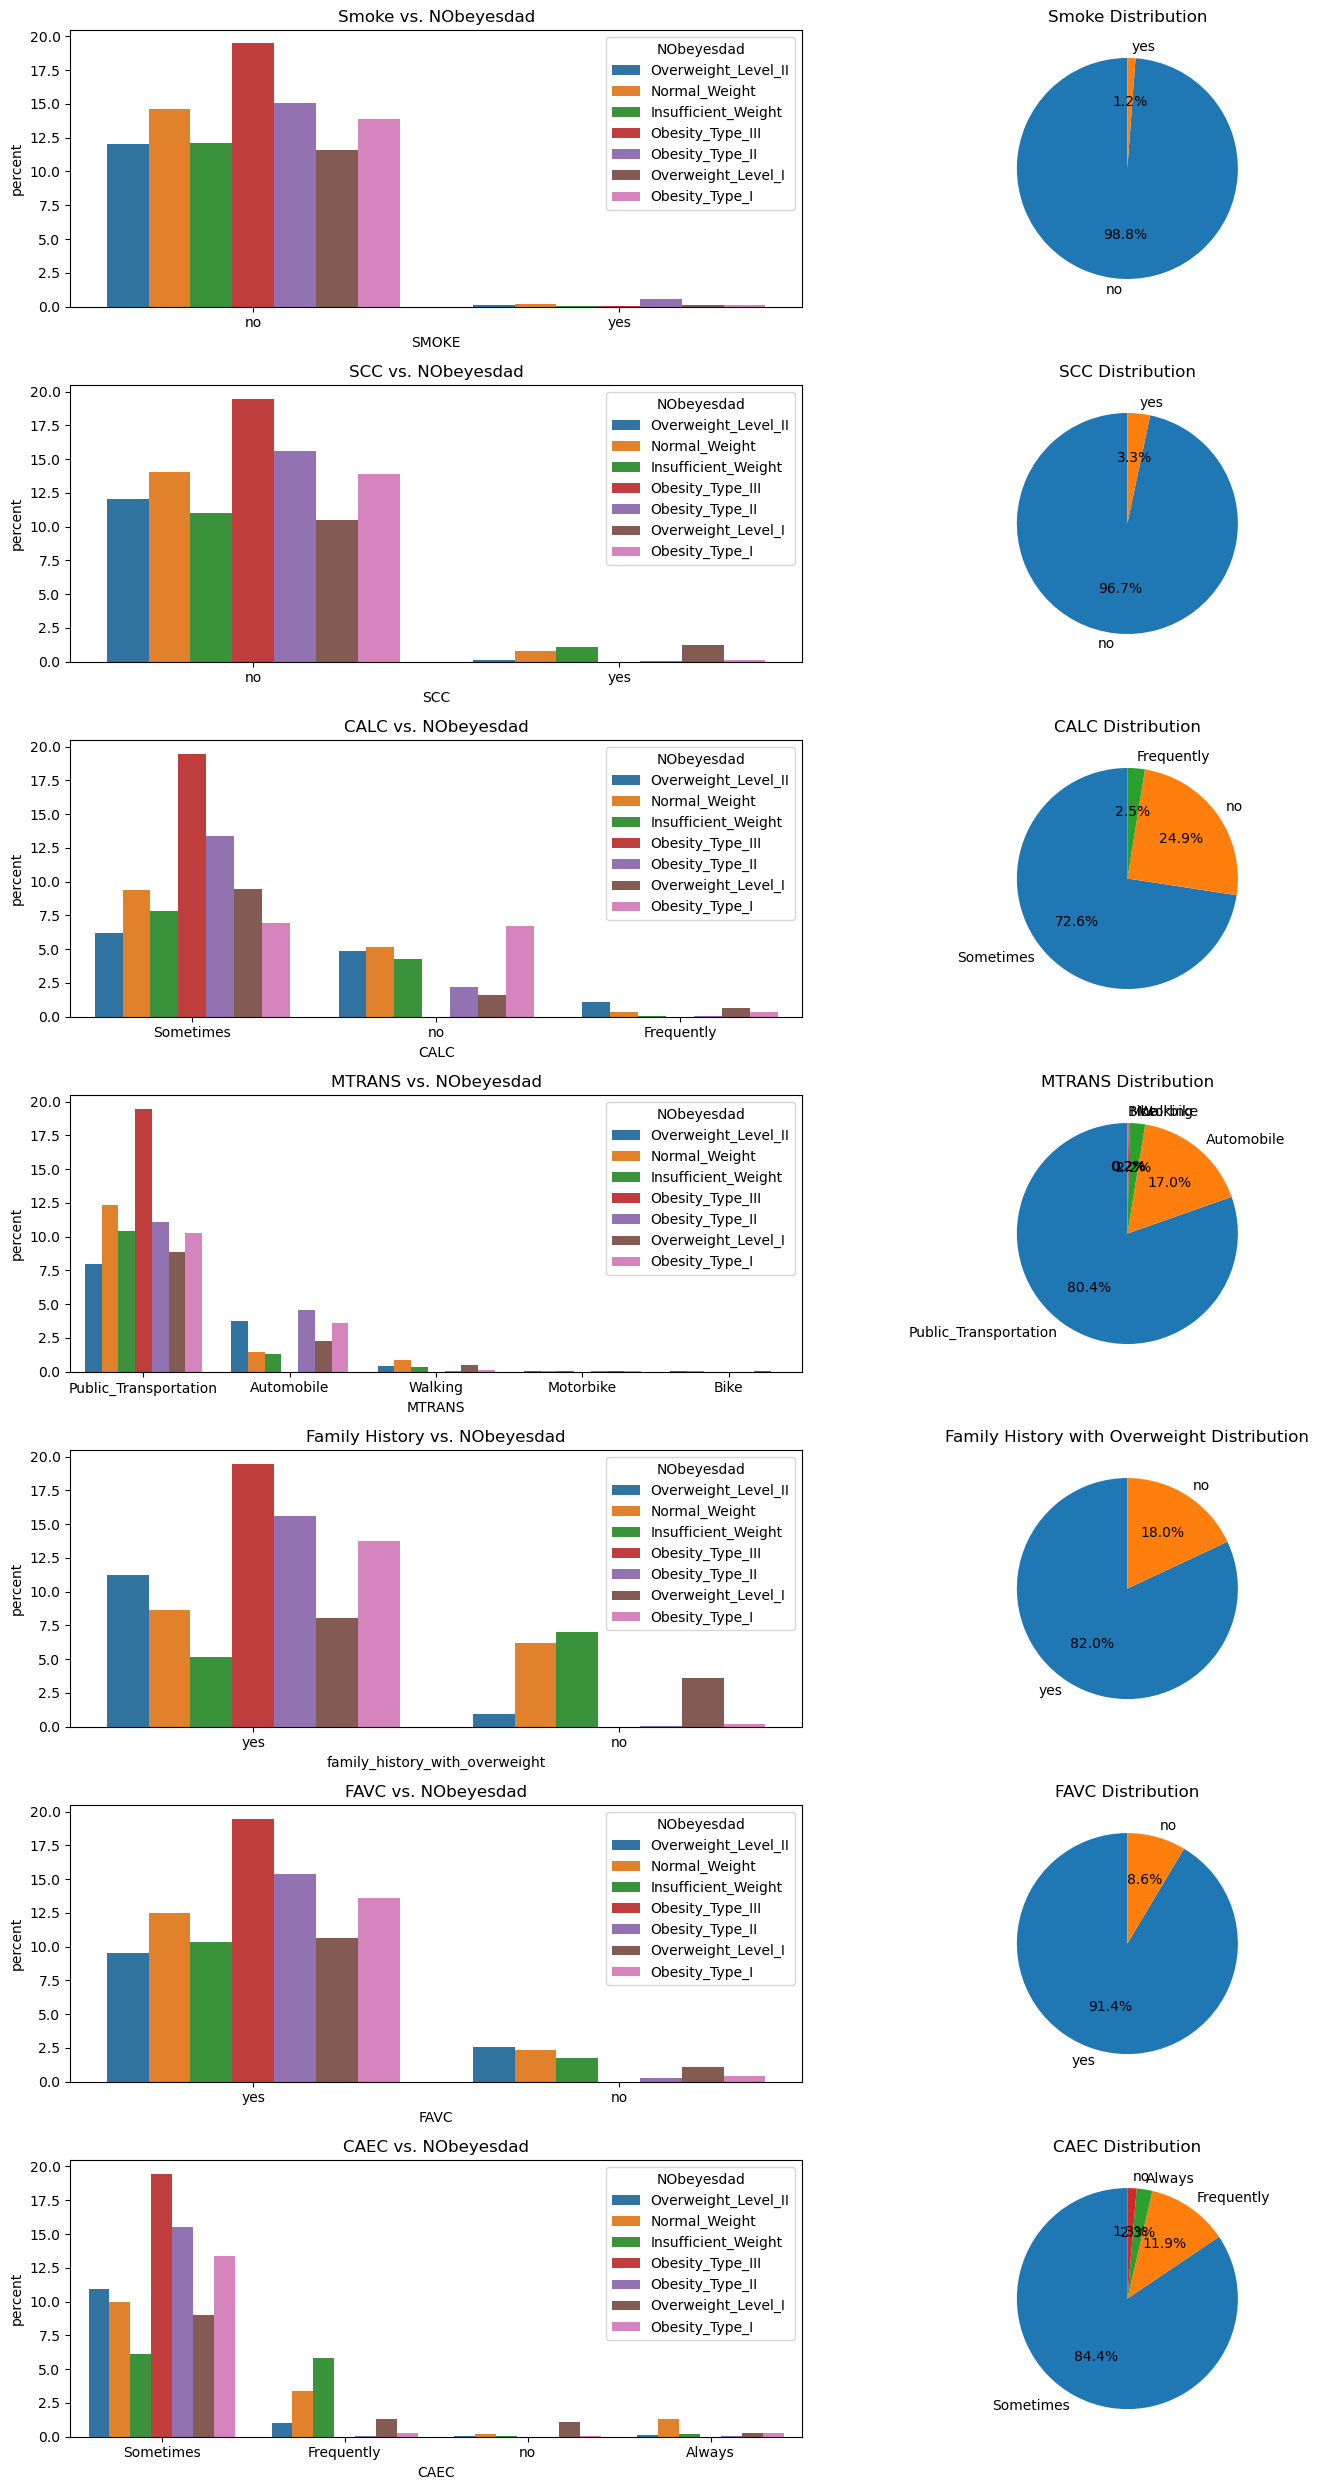

In [177]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 25))

df['SMOKE'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axes[0, 1])
axes[0, 1].set_title('Smoke Distribution')
axes[0, 1].set_ylabel(None)

df['SCC'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axes[1, 1])
axes[1, 1].set_title('SCC Distribution')
axes[1, 1].set_ylabel(None)

df['CALC'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axes[2, 1])
axes[2, 1].set_title('CALC Distribution')
axes[2, 1].set_ylabel(None)

df['MTRANS'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axes[3, 1])
axes[3, 1].set_title('MTRANS Distribution')
axes[3, 1].set_ylabel(None)

df['family_history_with_overweight'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axes[4, 1])
axes[4, 1].set_title('Family History with Overweight Distribution')
axes[4, 1].set_ylabel(None)

df['FAVC'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axes[5, 1])
axes[5, 1].set_title('FAVC Distribution')
axes[5, 1].set_ylabel(None)

df['CAEC'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axes[6, 1])
axes[6, 1].set_title('CAEC Distribution')
axes[6, 1].set_ylabel(None)

# Assuming 'NObeyesdad' is the target variable
sns.countplot(data=df, x='SMOKE', hue='NObeyesdad', stat='percent', ax=axes[0, 0])
axes[0, 0].set_title('Smoke vs. NObeyesdad')

sns.countplot(data=df, x='SCC', hue='NObeyesdad', stat='percent', ax=axes[1, 0])
axes[1, 0].set_title('SCC vs. NObeyesdad')

sns.countplot(data=df, x='CALC', hue='NObeyesdad', stat='percent', ax=axes[2, 0])
axes[2, 0].set_title('CALC vs. NObeyesdad')

sns.countplot(data=df, x='MTRANS', hue='NObeyesdad', stat='percent', ax=axes[3, 0])
axes[3, 0].set_title('MTRANS vs. NObeyesdad')

sns.countplot(data=df, x='family_history_with_overweight', hue='NObeyesdad', stat='percent', ax=axes[4, 0])
axes[4, 0].set_title('Family History vs. NObeyesdad')

sns.countplot(data=df, x='FAVC', hue='NObeyesdad', stat='percent', ax=axes[5, 0])
axes[5, 0].set_title('FAVC vs. NObeyesdad')

sns.countplot(data=df, x='CAEC', hue='NObeyesdad', stat='percent', ax=axes[6, 0])
axes[6, 0].set_title('CAEC vs. NObeyesdad')

plt.tight_layout()
plt.show()

#1 remove smoke
#2 remove scc 
#3 in calc merge frequently and somtimes
#4 remove Mtrans
#5 remove caec column

In [178]:
df_test_1['CALC'].value_counts()

CALC
Sometimes     9979
no            3513
Frequently     346
Always           2
Name: count, dtype: int64

In [179]:
df['CALC'].value_counts()
df['CALC'] = df['CALC'].replace('Frequently', 'Sometimes')
df_test_1['CALC'] = df_test_1['CALC'].replace(['Frequently', 'Always'], 'Sometimes')
df['CALC'].value_counts()

CALC
Sometimes    15595
no            5163
Name: count, dtype: int64

In [180]:
df['Effective_meals'] = df['NCP']/df['FCVC']
df_test_1['Effective_meals'] = df_test_1['NCP']/df_test_1['FCVC']

In [181]:
# df[df['NObeyesdad']=='Obesity_Type_III'] = 0
# df[df['NObeyesdad']=='Obesity_Type_II'] = 1
# df[df['NObeyesdad']=='Normal_Weight'] = 2
# df[df['NObeyesdad']=='Obesity_Type_I'] = 3
# df[df['NObeyesdad']=='Insufficient_Weight'] = 4
# df[df['NObeyesdad']=='Overweight_Level_II'] = 5
# df[df['NObeyesdad']=='Overweight_Level_I'] = 6
# df['NObeyesdad']

In [182]:
num_df = df[['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI', 'Weight', 'Height', 'Effective_meals']]
num_df
# sns.heatmap(num_df, annot=True)

,Age,FCVC,NCP,CH2O,FAF,TUE,BMI,Weight,Height,Effective_meals
0,24.443011,2.000000,2.983297,2.763573,0.000000,0.976473,28.259565,81.669950,1.699998,1.491648
1,18.000000,2.000000,3.000000,2.000000,1.000000,1.000000,23.422091,57.000000,1.560000,1.500000
2,18.000000,1.880534,1.411685,1.910378,0.866045,1.673584,17.126706,50.165754,1.711460,0.750683
3,20.952737,3.000000,3.000000,1.674061,1.467863,0.780199,44.855798,131.274851,1.710730,1.000000
4,31.641081,2.679664,1.971472,1.979848,1.967973,0.931721,25.599151,93.798055,1.914186,0.735716
...,...,...,...,...,...,...,...,...,...,...
20753,25.137087,2.919584,3.000000,2.151809,1.330519,0.196680,36.587084,114.187096,1.766626,1.027544
20754,18.000000,3.000000,4.000000,1.000000,2.000000,1.000000,17.099278,50.000000,1.710000,1.333333
20755,20.101026,2.407817,3.000000,2.000000,1.158040,1.198439,31.889841,105.580491,1.819557,1.245942
20756,33.852953,2.671238,1.971472,2.144838,0.000000,0.973834,28.899693,83.520113,1.700000,0.738037


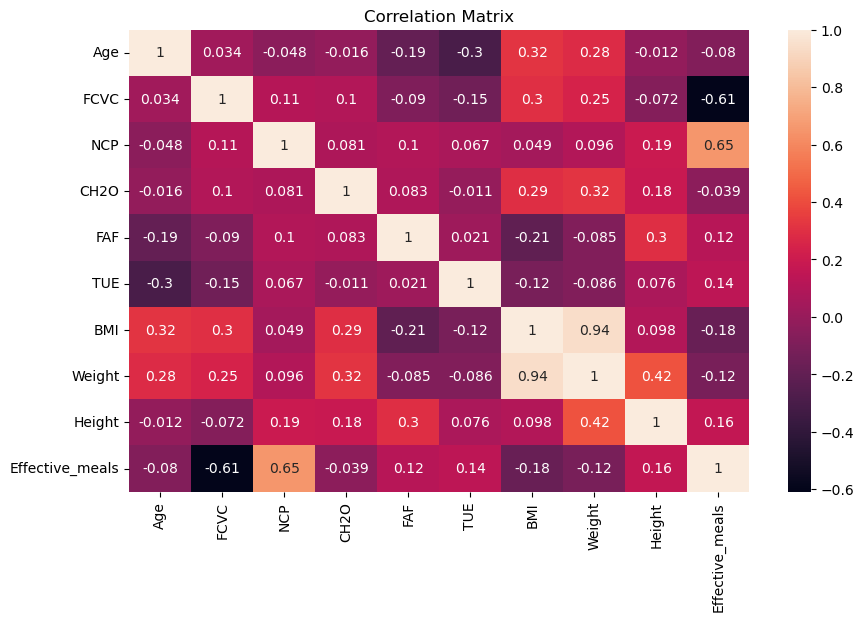

In [183]:
correlation_matrix = num_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

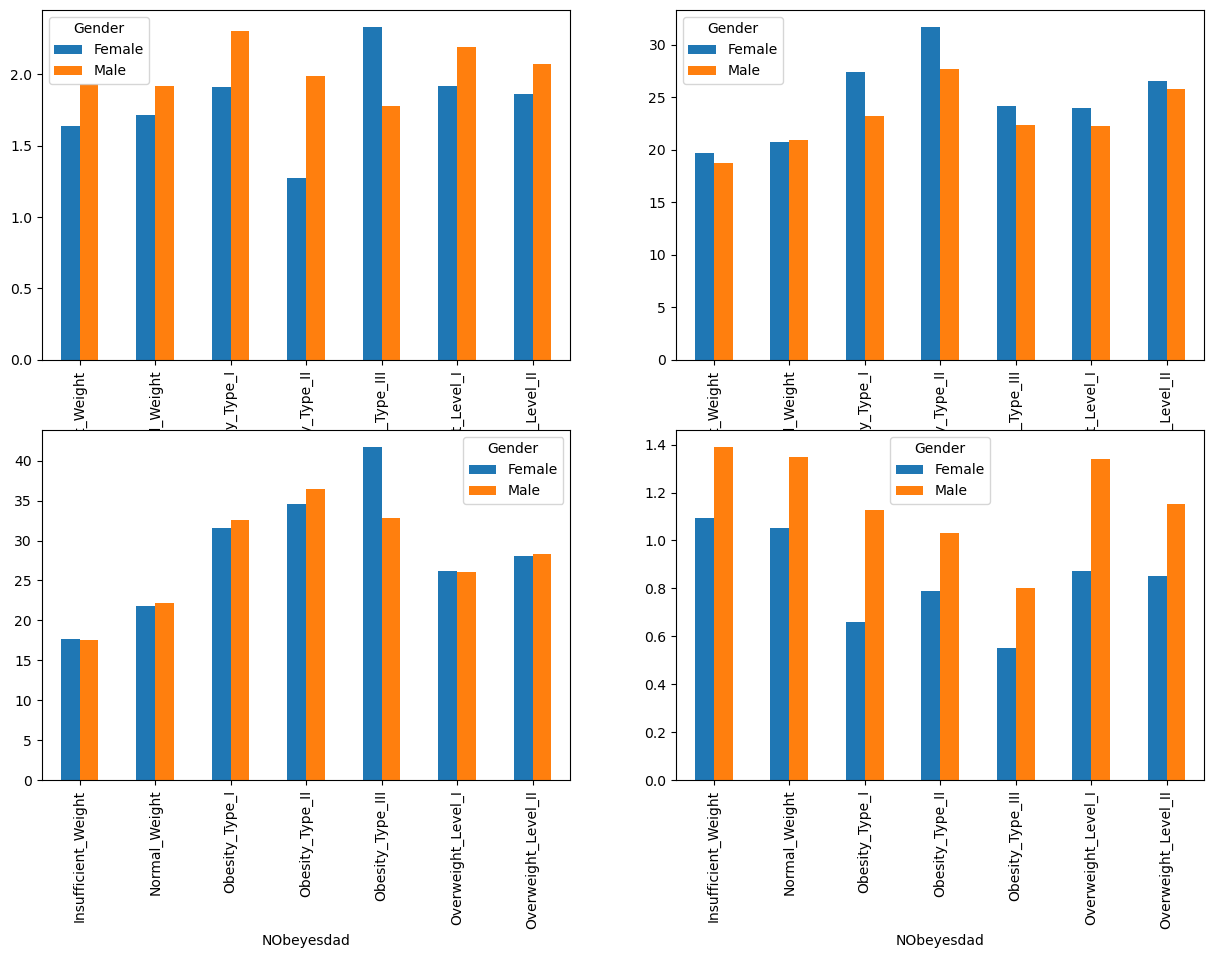

In [184]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

obesity = df.groupby(['NObeyesdad', 'Gender'])

obesity['CH2O'].mean().unstack().plot(kind='bar', ax=axes[0,0])
 
obesity['Age'].mean().unstack().plot(kind='bar', ax=axes[0, 1])
 
obesity['BMI'].mean().unstack().plot(kind='bar', ax=axes[1,0])

obesity['FAF'].mean().unstack().plot(kind='bar', ax=axes[1,1])

plt.show()
 

<Axes: xlabel='NObeyesdad'>

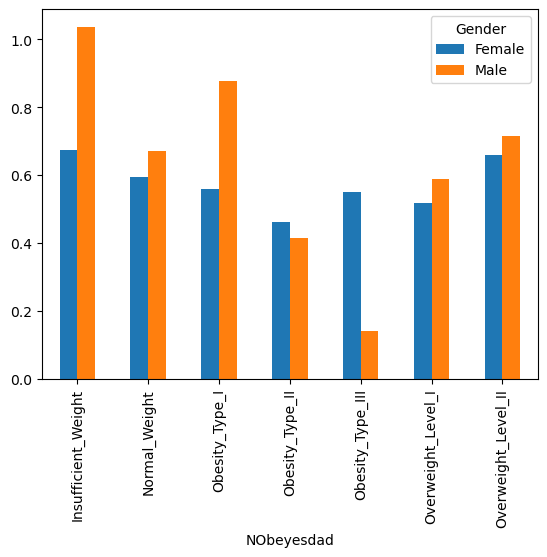

In [185]:
obesity['TUE'].mean().unstack().plot(kind='bar')

In [186]:
print(df.groupby(['NObeyesdad', 'Gender'])['Effective_meals'].min())
print(df.groupby(['NObeyesdad', 'Gender'])['NCP'].max())
print(df.groupby(['NObeyesdad', 'Gender'])['FCVC'].max())

NObeyesdad           Gender
Insufficient_Weight  Female    0.333333
                     Male      0.333333
Normal_Weight        Female    0.333333
                     Male      0.333333
Obesity_Type_I       Female    0.333333
                     Male      0.333333
Obesity_Type_II      Female    0.333333
                     Male      0.333333
Obesity_Type_III     Female    1.000000
                     Male      0.935433
Overweight_Level_I   Female    0.333333
                     Male      0.333333
Overweight_Level_II  Female    0.333333
                     Male      0.333333
Name: Effective_meals, dtype: float64
NObeyesdad           Gender
Insufficient_Weight  Female    4.00000
                     Male      4.00000
Normal_Weight        Female    4.00000
                     Male      4.00000
Obesity_Type_I       Female    4.00000
                     Male      4.00000
Obesity_Type_II      Female    3.90779
                     Male      4.00000
Obesity_Type_III     Female    3.0

In [187]:
print(df.columns)
columns_to_remove = ['Height', 'Weight', 'SMOKE', 'SCC', 'TUE', 'NCP', 'FCVC', 'MTRANS', 'CAEC']
df.drop(columns=columns_to_remove, inplace=True)
df_test_1.drop(columns=columns_to_remove, inplace=True)


Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad', 'BMI', 'Effective_meals'],
      dtype='object')


In [188]:
df.head()

,Gender,Age,family_history_with_overweight,FAVC,CH2O,FAF,CALC,NObeyesdad,BMI,Effective_meals
0,Male,24.443011,yes,yes,2.763573,0.000000,Sometimes,Overweight_Level_II,28.259565,1.491648
1,Female,18.000000,yes,yes,2.000000,1.000000,no,Normal_Weight,23.422091,1.500000
2,Female,18.000000,yes,yes,1.910378,0.866045,no,Insufficient_Weight,17.126706,0.750683
3,Female,20.952737,yes,yes,1.674061,1.467863,Sometimes,Obesity_Type_III,44.855798,1.000000
4,Male,31.641081,yes,yes,1.979848,1.967973,Sometimes,Overweight_Level_II,25.599151,0.735716


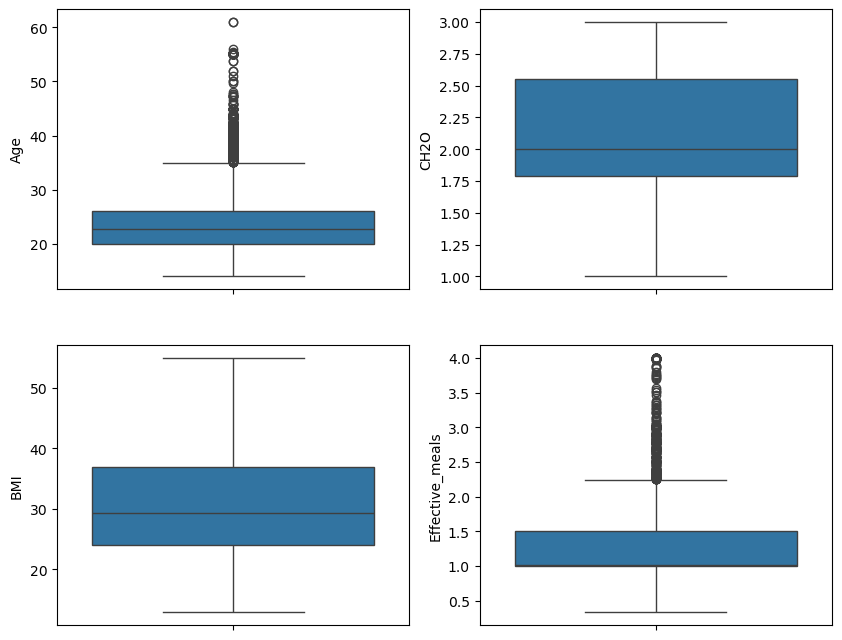

In [189]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
sns.boxplot(df['Age'], ax=axes[0, 0])
sns.boxplot(df['CH2O'], ax=axes[0, 1])
sns.boxplot(df['BMI'], ax=axes[1, 0])
sns.boxplot(df['Effective_meals'], ax=axes[1, 1])
plt.show()

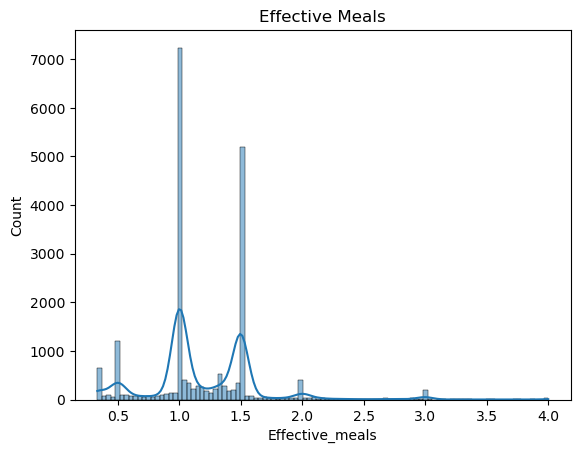

In [190]:
sns.histplot(df, x=df['Effective_meals'], kde=True)
plt.title('Effective Meals')
plt.show()

In [191]:
df[df['Effective_meals']>=4]

,Gender,Age,family_history_with_overweight,FAVC,CH2O,FAF,CALC,NObeyesdad,BMI,Effective_meals
1771,Male,19.0,yes,yes,1.0,2.0,Sometimes,Overweight_Level_II,28.086420,4.0
2318,Female,17.0,no,yes,1.0,2.0,no,Normal_Weight,23.046875,4.0
2429,Female,19.0,yes,yes,2.0,1.0,Sometimes,Normal_Weight,21.230572,4.0
2692,Female,22.0,no,yes,2.0,2.0,no,Insufficient_Weight,17.301038,4.0
4085,Female,17.0,no,yes,1.0,2.0,Sometimes,Insufficient_Weight,17.301038,4.0
5277,Female,24.0,yes,yes,3.0,2.0,Sometimes,Obesity_Type_I,32.660764,4.0
6904,Female,21.0,no,yes,2.0,3.0,no,Normal_Weight,18.339100,4.0
7451,Female,18.0,no,yes,1.0,2.0,Sometimes,Insufficient_Weight,17.301038,4.0
11079,Male,21.0,no,yes,2.0,3.0,Sometimes,Normal_Weight,22.724403,4.0
13309,Male,23.0,yes,no,2.0,2.0,Sometimes,Normal_Weight,23.781213,4.0


In [192]:
X = df.drop(columns=['NObeyesdad'])
y = df['NObeyesdad']

In [193]:
X.head()

,Gender,Age,family_history_with_overweight,FAVC,CH2O,FAF,CALC,BMI,Effective_meals
0,Male,24.443011,yes,yes,2.763573,0.000000,Sometimes,28.259565,1.491648
1,Female,18.000000,yes,yes,2.000000,1.000000,no,23.422091,1.500000
2,Female,18.000000,yes,yes,1.910378,0.866045,no,17.126706,0.750683
3,Female,20.952737,yes,yes,1.674061,1.467863,Sometimes,44.855798,1.000000
4,Male,31.641081,yes,yes,1.979848,1.967973,Sometimes,25.599151,0.735716


In [194]:
y.head()

0    Overweight_Level_II
1          Normal_Weight
2    Insufficient_Weight
3       Obesity_Type_III
4    Overweight_Level_II
Name: NObeyesdad, dtype: object

In [195]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [196]:
X_train.head()

,Gender,Age,family_history_with_overweight,FAVC,CH2O,FAF,CALC,BMI,Effective_meals
18207,Male,33.000000,yes,yes,3.00000,1.000000,Sometimes,29.561946,0.500000
12325,Male,18.000000,no,yes,1.00000,1.000000,Sometimes,19.531250,1.500000
2680,Male,25.526746,yes,yes,2.00000,0.631565,Sometimes,36.739509,1.015125
728,Male,23.000000,yes,yes,1.85916,0.906843,Sometimes,17.824228,1.091607
19760,Female,17.000000,no,yes,3.00000,1.000000,Sometimes,24.557752,1.000000


In [197]:
from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

columns_to_encode = ['Gender', 'family_history_with_overweight', 'FAVC', 'CALC']

ct = ColumnTransformer([
                 ('column_transformer', OrdinalEncoder(),  ['Gender', 'family_history_with_overweight', 'FAVC', 'CALC'])    
       ], remainder='passthrough'

       )

X_train_encoded = ct.fit_transform(X_train) 
X_test_encoded = ct.transform(X_test)
df_test = ct.transform(df_test_1)

In [198]:
X_train.head()

,Gender,Age,family_history_with_overweight,FAVC,CH2O,FAF,CALC,BMI,Effective_meals
18207,Male,33.000000,yes,yes,3.00000,1.000000,Sometimes,29.561946,0.500000
12325,Male,18.000000,no,yes,1.00000,1.000000,Sometimes,19.531250,1.500000
2680,Male,25.526746,yes,yes,2.00000,0.631565,Sometimes,36.739509,1.015125
728,Male,23.000000,yes,yes,1.85916,0.906843,Sometimes,17.824228,1.091607
19760,Female,17.000000,no,yes,3.00000,1.000000,Sometimes,24.557752,1.000000


In [199]:
X_train_encoded

array([[ 1.        ,  1.        ,  1.        , ...,  1.        ,
        29.56194571,  0.5       ],
       [ 1.        ,  0.        ,  1.        , ...,  1.        ,
        19.53125   ,  1.5       ],
       [ 1.        ,  1.        ,  1.        , ...,  0.631565  ,
        36.73950869,  1.01512537],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  3.        ,
        24.22145329,  1.5       ],
       [ 1.        ,  1.        ,  1.        , ...,  2.        ,
        19.60181338,  2.        ],
       [ 0.        ,  1.        ,  1.        , ...,  2.        ,
        21.23057202,  1.5       ]])

In [200]:
X_test.head()

,Gender,Age,family_history_with_overweight,FAVC,CH2O,FAF,CALC,BMI,Effective_meals
17392,Male,25.666680,yes,yes,2.136398,1.168368,no,34.578921,1.096240
14299,Female,19.665881,no,no,1.622440,0.143955,Sometimes,18.933083,0.739428
14753,Male,21.052016,yes,yes,2.766674,0.146919,Sometimes,26.902520,1.496811
15306,Female,29.000000,yes,no,2.000000,0.000000,Sometimes,26.813590,1.500000
16482,Female,20.000000,no,yes,2.000000,1.000000,Sometimes,26.222685,1.500000


In [201]:
X_test_encoded

array([[ 1.        ,  1.        ,  1.        , ...,  1.168368  ,
        34.57892066,  1.09623961],
       [ 0.        ,  0.        ,  0.        , ...,  0.143955  ,
        18.93308317,  0.73942833],
       [ 1.        ,  1.        ,  1.        , ...,  0.146919  ,
        26.90251996,  1.4968115 ],
       ...,
       [ 0.        ,  1.        ,  1.        , ...,  1.998047  ,
        46.67831248,  1.        ],
       [ 0.        ,  1.        ,  1.        , ...,  0.        ,
        40.38294596,  1.        ],
       [ 0.        ,  1.        ,  1.        , ...,  1.427037  ,
        45.20803313,  1.        ]])

In [202]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [203]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_encoded, y_train_encoded)

C:\Users\masan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [204]:
y_pred = lr.predict(X_test_encoded)
# df_test_pred = le.predict(df_test)

In [205]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_encoded, y_pred)

0.6307803468208093

In [206]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=10,random_state = 42)
clf.fit(X_train_encoded, y_train_encoded)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [207]:
y_pred = clf.predict(X_test_encoded)
accuracy_score(y_test_encoded, y_pred)

0.861271676300578

In [208]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=10,random_state = 42)
rfc.fit(X_train_encoded, y_train_encoded)

RandomForestClassifier(max_depth=10, random_state=42)

In [209]:
y_pred = rfc.predict(X_test_encoded)
accuracy_score(y_test_encoded, y_pred)

0.8802986512524085

In [210]:
df_test_pred = rfc.predict(df_test)

In [211]:
df_test_1.head()

,id,Gender,Age,family_history_with_overweight,FAVC,CH2O,FAF,CALC,BMI,Effective_meals
0,20758,Male,26.899886,yes,yes,2.825629,0.855400,Sometimes,35.315411,1.020889
1,20759,Female,21.000000,yes,yes,3.000000,1.000000,Sometimes,25.781250,0.500000
2,20760,Female,26.000000,yes,yes,2.621877,0.000000,Sometimes,41.324115,1.000000
3,20761,Male,20.979254,yes,yes,2.786417,0.094851,Sometimes,42.976937,1.488954
4,20762,Female,26.000000,yes,yes,2.653531,0.000000,Sometimes,39.584143,1.000000


In [212]:
submission = {'id':df_test_1['id'], 'NObeyesdad':le.inverse_transform(df_test_pred)}

In [213]:
sub = pd.DataFrame(submission)

In [216]:
sub.to_csv('submission.csv', index=False)